In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
dataset_root = "../datasets/"

## Beijing PM2.5

<https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data/>

### Attribute Information

- `No`: row number
- `year`: year of data in this row
- `month`: month of data in this row
- `day`: day of data in this row
- `hour`: hour of data in this row
- `pm2.5`: PM2.5 concentration (ug/m^3)
- `DEWP`: Dew Point (â„ƒ)
- `TEMP`: Temperature (â„ƒ)
- `PRES`: Pressure (hPa)
- `cbwd`: Combined wind direction
- `Iws`: Cumulated wind speed (m/s)
- `Is`: Cumulated hours of snow
- `Ir`: Cumulated hours of rain

In [3]:
csvfile = os.path.join(dataset_root, "beijing_pm2.5", "PRSA_data_2010.1.1-2014.12.31.csv")
df = pd.read_csv(csvfile)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [4]:
df[['TEMP','DEWP']]

,TEMP,DEWP
0,-11.0,-21
1,-12.0,-21
2,-11.0,-21
3,-14.0,-21
4,-12.0,-20
...,...,...
43819,-2.0,-23
43820,-3.0,-22
43821,-3.0,-22
43822,-4.0,-22


<AxesSubplot:>

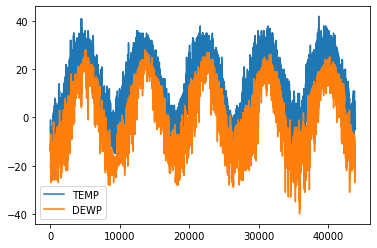

In [5]:
df[['TEMP', 'DEWP']].plot()

array([[<AxesSubplot:title={'center':'Ir'}>]], dtype=object)

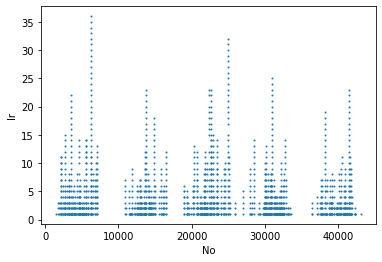

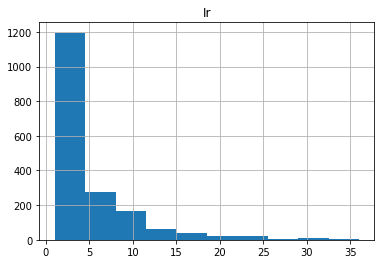

In [6]:
df[df['Ir'] > df['Ir'].min()][['No','Ir']].plot(kind='scatter', x='No', y='Ir', s=1)
df[df['Ir'] > df['Ir'].min()][['Ir']].hist()

In [7]:
# Get average values for each year/month.
df.groupby(['year','month'])[['DEWP','TEMP','Ir']].mean().head()

DEWP       TEMP        Ir
year month                                
2010 1     -17.013441  -6.162634  0.000000
     2     -13.156250  -1.922619  0.000000
     3      -7.955645   3.293011  0.205645
     4      -3.330556  10.806944  0.252778
     5       7.651882  20.831989  0.534946

Text(0.5, 1.0, 'Average $TEMP$ and $DEWP$\nGrouped by $(year,month)$')

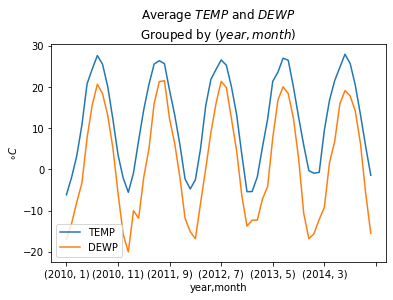

In [8]:
df.groupby(['year','month'])[['TEMP','DEWP']].mean().plot()
plt.ylabel('$\circ C$')
plt.title('Average $TEMP$ and $DEWP$\nGrouped by $(year,month)$')